In [2]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


In [3]:
uploaded = files.upload()


Saving hw4_q4_photo_2.jpg to hw4_q4_photo_2.jpg
Saving hw4_q4_photo_1.jpg to hw4_q4_photo_1.jpg


In [4]:
ref_img = plt.imread("hw4_q4_photo_1.jpg")
input_img = plt.imread("hw4_q4_photo_2.jpg")

In [7]:
# (Height, Width, Color_Channels)
# Color_Channels: 3 for RGB
print("Reference shape:", ref_img.shape)
print("Input shape:", input_img.shape)

Reference shape: (1141, 1168, 3)
Input shape: (781, 915, 3)


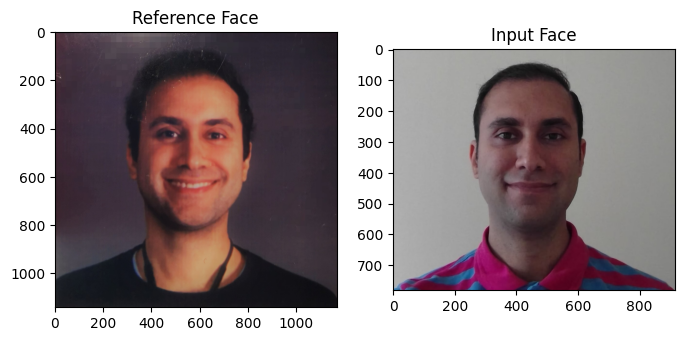

In [13]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(ref_img)
plt.title("Reference Face")
# plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(input_img)
plt.title("Input Face")
# plt.axis("off")

# plt.tight_layout()
plt.show()


Reference gray shape: (1141, 1168)
Input gray shape: (781, 915)


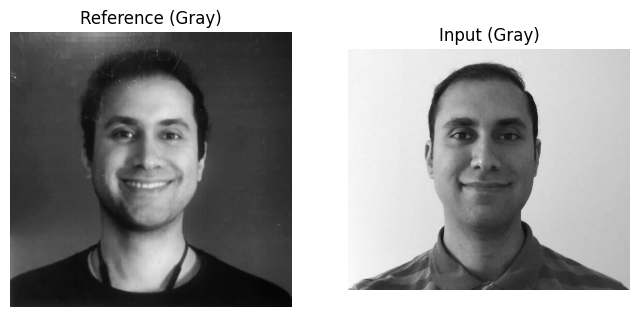

In [14]:
# The ITU-R BT.601 luminance formula is \(Y^{\prime }=0.299R^{\prime }+0.587G^{\prime }+0.114B^{\prime }\)

def to_gray(img):
    if img.ndim == 3:
        img = img[..., :3]
        return 0.299*img[...,0] + 0.587*img[...,1] + 0.114*img[...,2]
    else:
        return img

ref_gray   = to_gray(ref_img)
input_gray = to_gray(input_img)

print("Reference gray shape:", ref_gray.shape)
print("Input gray shape:", input_gray.shape)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(ref_gray, cmap="gray")
plt.title("Reference (Gray)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(input_gray, cmap="gray")
plt.title("Input (Gray)")
plt.axis("off")

# plt.tight_layout()
plt.show()


In [15]:
from PIL import Image
import numpy as np

def resize_to_match(img1_path, img2_path):
    """
    Resizes the second image to match the dimensions of the first image.

    Args:
        img1_path (str): File path for the first image (reference).
        img2_path (str): File path for the second image (to be resized).

    Returns:
        tuple: (resized_img1_np, resized_img2_np) as NumPy arrays.
    """
    # 1. Load images using Pillow
    img1_pil = Image.open(img1_path)
    img2_pil = Image.open(img2_path)

    # 2. Determine the target size (dimensions of the first image)
    target_size = img1_pil.size  # Returns (width, height)

    # 3. Resize the second image
    # Image.resize() performs the interpolation
    img2_resized_pil = img2_pil.resize(target_size)

    # 4. Convert both images back to NumPy arrays (if needed for further processing)
    img1_np = np.array(img1_pil)
    img2_resized_np = np.array(img2_resized_pil)

    # Check the final shapes
    print(f"Original 1 shape: {img1_np.shape}")
    print(f"Resized 2 shape: {img2_resized_np.shape}")

    return img1_np, img2_resized_np


ref_resized, input_resized = resize_to_match('hw4_q4_photo_1.jpg', 'hw4_q4_photo_2.jpg')

Original 1 shape: (1141, 1168, 3)
Resized 2 shape: (1141, 1168, 3)


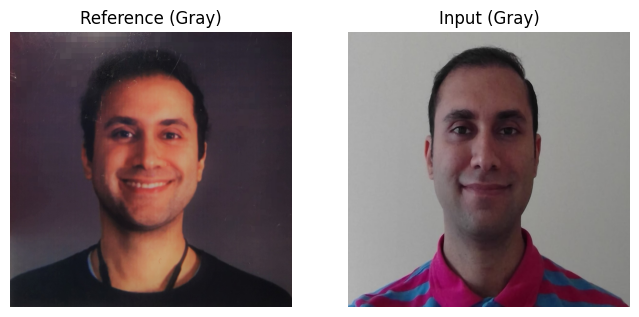

In [16]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(ref_resized, cmap="gray")
plt.title("Reference (Gray)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(input_resized, cmap="gray")
plt.title("Input (Gray)")
plt.axis("off")

# plt.tight_layout()
plt.show()

In [17]:
ref_norm = ref_resized.astype("float32")
input_norm = input_resized.astype("float32")

if ref_norm.max() > 1.0 or input_norm.max() > 1.0:
    ref_norm /= 255.0
    input_norm /= 255.0

diff = ref_norm - input_norm

mae = np.mean(np.abs(diff))
mse = np.mean(diff**2)

print("MAE:", mae)
print("MSE:", mse)

MAE: 0.3226422
MSE: 0.123753525


In [18]:
MAE_THRESHOLD = 0.08
MSE_THRESHOLD = 0.02

if (mae < MAE_THRESHOLD) and (mse < MSE_THRESHOLD):
    result_text = "Face Matched"
    color = "green"
else:
    result_text = "Face Not Matched"
    color = "red"

print("Result:", result_text)

Result: Face Not Matched


Text(0.5, 1.0, 'Input Face')

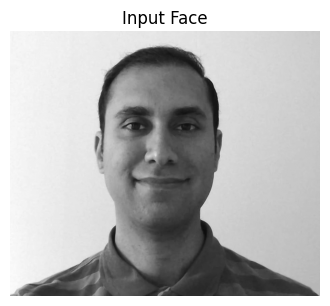

In [21]:
plt.figure(figsize=(4,4))
plt.imshow(input_gray, cmap="gray")
plt.axis("off")
plt.title("Input Face")

In [30]:
def compute_mse_mae(ref_img_path, input_img_path):
  input_img = plt.imread(input_img_path)
  input_img_gray = to_gray(input_img)
  input_img_gray_resized = resize_to_match(ref_img_path, input_img_path)[1]

  ref_norm = ref_resized.astype("float32")
  input_norm = input_img_gray_resized.astype("float32")

  if ref_norm.max() > 1.0 or input_norm.max() > 1.0:
    ref_norm /= 255.0
    input_norm /= 255.0

  diff = ref_norm - input_norm

  mae = np.mean(np.abs(diff))
  mse = np.mean(diff**2)

  print("MAE:", mae)
  print("MSE:", mse)

  return mae, mse

mae, mse = compute_mse_mae("hw4_q4_photo_1.jpg", "hw4_q4_photo_2.jpg")

Original 1 shape: (1141, 1168, 3)
Resized 2 shape: (1141, 1168, 3)
MAE: 0.3226422
MSE: 0.123753525


In [34]:
input_images = [
    "hw4_q4_photo_2.jpg",
    "hw4_q4_photo_3.jpg",
    "hw4_q4_photo_4.jpg",
    "hw4_q4_photo_5.jpg",
    "hw4_q4_photo_6.jpg"
]

results = []

for img_name in input_images:
    mse_value = compute_mse_mae("hw4_q4_photo_1.jpg", img_name)
    results.append({"Image": img_name, "MSE": mse_value})

df_results = pd.DataFrame(results)
df_results


Original 1 shape: (1141, 1168, 3)
Resized 2 shape: (1141, 1168, 3)
MAE: 0.3226422
MSE: 0.123753525


FileNotFoundError: [Errno 2] No such file or directory: 'hw4_q4_photo_3.jpg'